**Marketing_Funnel_Conversion_Analysis**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank_marketing.csv")


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
total_contacts = len(df)

In [7]:
engaged_users = df[df["duration"] > 0].shape[0]


In [8]:
converted_users = df[df["y"] == "yes"].shape[0]



In [9]:
total_contacts
engaged_users
converted_users


521

In [10]:
funnel_df = pd.DataFrame({
    "Stage": ["Contacted", "Engaged", "Converted"],
    "Users": [total_contacts, engaged_users, converted_users]
})

funnel_df


,Stage,Users
0,Contacted,4521
1,Engaged,4521
2,Converted,521


In [11]:
engagement_rate = (engaged_users / total_contacts) * 100


In [12]:
conversion_rate = (converted_users / engaged_users) * 100


In [13]:
print(f"Engagement Rate: {engagement_rate:.2f}%")
print(f"Conversion Rate: {conversion_rate:.2f}%")


Engagement Rate: 100.00%
Conversion Rate: 11.52%


In [14]:
dropoff_contact_to_engaged = 100 - engagement_rate
dropoff_engaged_to_converted = 100 - conversion_rate

print(f"Drop-off (Contact → Engaged): {dropoff_contact_to_engaged:.2f}%")
print(f"Drop-off (Engaged → Converted): {dropoff_engaged_to_converted:.2f}%")


Drop-off (Contact → Engaged): 0.00%
Drop-off (Engaged → Converted): 88.48%


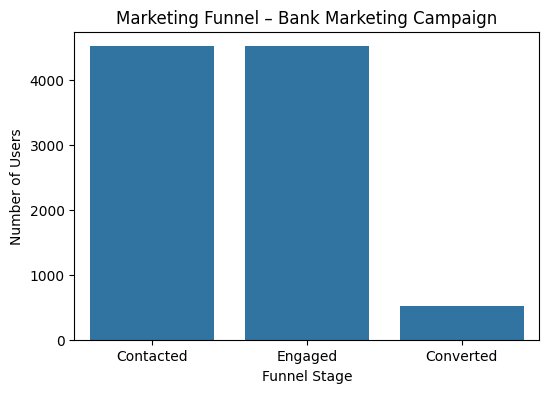

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x="Stage", y="Users", data=funnel_df)
plt.title("Marketing Funnel – Bank Marketing Campaign")
plt.ylabel("Number of Users")
plt.xlabel("Funnel Stage")
plt.show()


In [16]:
conversion_by_contact = (
    df.groupby("contact")["y"]
    .value_counts(normalize=True)
    .unstack() * 100
)

conversion_by_contact


y,no,yes
contact,,
cellular,85.635359,14.364641
telephone,85.382060,14.617940
unknown,95.392749,4.607251


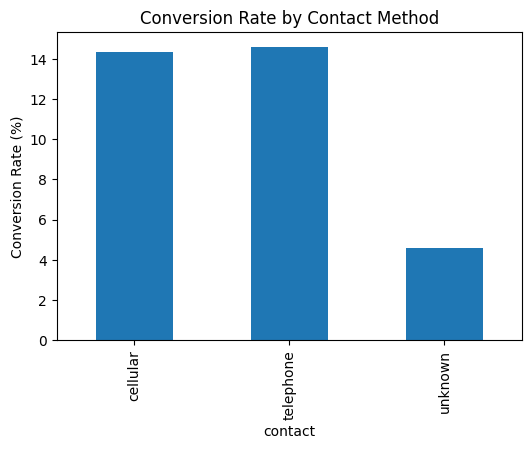

In [17]:
conversion_by_contact["yes"].plot(kind="bar", figsize=(6,4))
plt.title("Conversion Rate by Contact Method")
plt.ylabel("Conversion Rate (%)")
plt.show()


### Key Insights
- Significant drop-off occurs between engagement and conversion
- Not all engaged users convert
- Certain contact methods perform better
- Funnel optimization is needed at conversion stage


### Recommendations
- Improve follow-up strategy after engagement
- Focus campaigns on high-converting contact methods
- Refine targeting to improve lead quality
- Optimize conversion messaging
